# Exercise M4.01

The goal of this exercise is to build an intuition on what will be the parameters' values of a linear model when the link between the data and the target is non-linear.  
First, we will generate such non-linear data.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
rng = np.random.RandomState(0)

# Generate data
n_samples = 100
data_max, data_min = 1.4, -1.4

len_data = (data_max - data_min)
data = rng.rand(n_samples) * len_data - len_data/2

noise = rng.randn(n_samples) * .3
target = data **3 - .5 * data ** 2 + noise

In [3]:
full_data = pd.DataFrame({"data": data, "target": target})

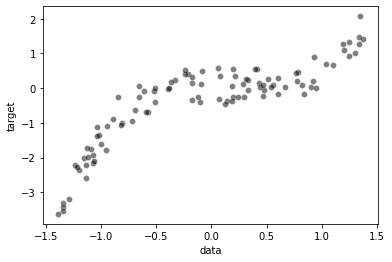

In [5]:
sns.scatterplot(data=full_data, x="data", y="target", color="black",
                    alpha=0.5);

We observe that the link between the data `data` and vector `target` is non-linear. For instance, `data` could be the years of experience (normalized) and target the salary (normalized). Therefore, the problem here would be to infer the salary given the year of experience.  

Using the function `f` defined below, find both the `weight` and the `intercept` that you think will lead to good linear model. Plot both the data and the predictions of this model.

In [6]:
def f(data, weight=0, intercept=0):
    target_predict = weight * data  + intercept
    return target_predict

In [20]:
predictions = f(data, weight=1.2, intercept=-.2)

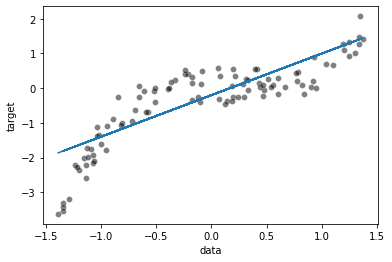

In [21]:
ax = sns.scatterplot(data=full_data, x="data", y="target", color="black",
                     alpha=0.5)
ax.plot(data, predictions);

Compute the mean squared error for this model

In [23]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(target, f(data, weight=1.2, intercept=-0.2))
print(f"The MSE is {error}")

The MSE is 0.3811808390081437


Train a linear regression model on this dataset

In [25]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()

<div class="alert alert-block alert-warning">
<b>Warning:</b><br>
    In scikit-learn, by convention <em>data</em> (also called X) should be a 2D matrix of shape <em>(n_samples, n_features)</em>. If <em>data</em> is a 1D vector, ou need to reshape it into a matrix with a single column if the vector represents a feature or a single row if the vector represents a sample.
</div>

In [26]:
data_2d = data.reshape(-1, 1)
linear_regression.fit(data_2d, target)

LinearRegression()

Compute prediction from the linear regression model and plot both the data and the predictions

In [28]:
predictions = linear_regression.predict(data_2d)

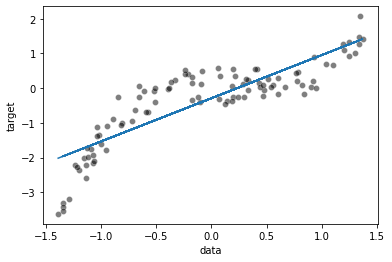

In [30]:
ax = sns.scatterplot(data=full_data, x='data', y='target', color='black', alpha=.5)
ax.plot(data, predictions);

In [31]:
error = mean_squared_error(target, predictions)
print(f"The MSE is {error}")

The MSE is 0.37117544002508424


In [32]:
linear_regression.intercept_

-0.28930457228258805

In [33]:
linear_regression.coef_

array([1.24617601])

Our guess was quite close to the optimal linear regression parameters.